# Basit Doğrusal Regresyon - Model Tuning - Model Doğrulama

### Bir öğrencinin okul başarısını etkileyen faktörleri gösteren bir veri setine sahibiz. Bu, öğrencinin yaşı, cinsiyeti, evde çalışma saatleri ve öğle yemeği tüketimi gibi faktörler, sınavda aldığı puanı etkilemektedir. Veri setindeki her öğrenci, bu faktörlere göre notu ile temsil edilmektedir.

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
# veri setini oluşturalım.

age = np.random.randint(18, 25, size=100)
gender = np.random.choice(['Erkek', 'Kadın'], size=100)
study_hours = np.random.randint(1, 10, size=100)
lunch = np.random.choice(['Var', 'Yok'], size=100)
score = 50 + (age * 2) + (study_hours * 5) - (lunch == 'Var') * 10 + np.random.randint(-5, 5, size=100)

data = pd.DataFrame({
    'Yaş': age,
    'Cinsiyet': gender,
    'Çalışma Saati': study_hours,
    'Öğle Yemeği': lunch,
    'Not': score
})

data.head()

,Yaş,Cinsiyet,Çalışma Saati,Öğle Yemeği,Not
0,19,Kadın,1,Yok,91
1,23,Kadın,6,Yok,129
2,23,Kadın,1,Yok,97
3,19,Erkek,1,Var,79
4,18,Kadın,4,Yok,109


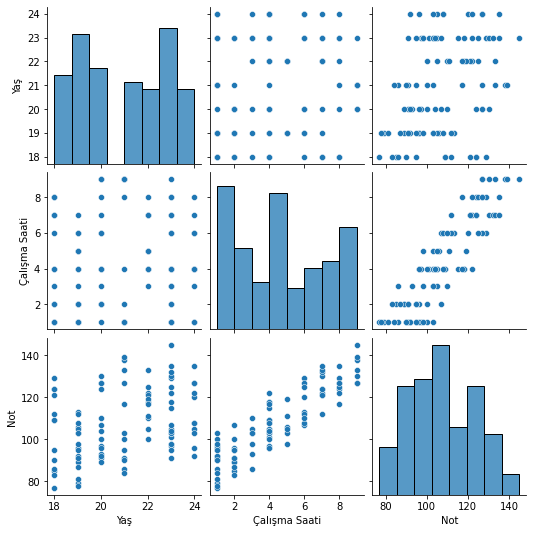

In [41]:
# veri setini görselleştirelim.

sns.pairplot(data=data);

In [42]:
# bağımlı ve bağımsız değişkenlerimizi oluşturalım.

X = data[['Çalışma Saati', 'Yaş']]
y = data['Not']

In [43]:
# train ve test setlerinin ayrılması.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# modelin oluşturulması ve eğitilmesi.

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
# MSE ve R-kare değerlerinin hesaplanması.

y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print('MSE Değeri: ', train_mse)
print('R-kare Değeri: ', train_r2)

MSE Değeri:  36.00804007125905
R-kare Değeri:  0.8686705943915616


#### Burada, eğitim veri setimiz için ortalama kare hata (MSE) ve R-kare değerlerini hesapladık. MSE, gerçek ve tahmin edilen değerler arasındaki farkın karelerinin ortalamasını hesaplayarak modelimizin ne kadar iyi çalıştığını ölçer. R-kare değeri ise, bağımsız değişkenin, bağımlı değişkeni ne kadar iyi açıkladığını ölçer.

In [46]:
# Model tuning ve model doğrulama işlemlerini yapalım.

params = {'fit_intercept':[True, False]}

grid_model = GridSearchCV(model, params, cv=5)
grid_model.fit(X_train, y_train)

# En iyi parametreleri yazdıralım.
print('En iyi parametreler: ', grid_model.best_params_)

# Doğrulama İşlemleri
cv_scores = cross_val_score(grid_model, X, y, cv=5)
print('Çapraz Doğrulama Skorları: ', cv_scores)
print('Ortalama Çapraz Doğrulama Skoru: ', cv_scores.mean())

En iyi parametreler:  {'fit_intercept': True}
Çapraz Doğrulama Skorları:  [0.79904356 0.88176163 0.77528447 0.84382712 0.79022513]
Ortalama Çapraz Doğrulama Skoru:  0.8180283805239192


#### GridSearchCV() ile en iyi hiperparametreleri belirledikten sonra, cross_val_score fonksiyonunu kullanarak modelimizin performansını ölçebiliriz. Burada, 5 katlı çapraz doğrulama kullanarak, modelimizin ortalama çapraz doğrualama skorunu hesapladık.

### Sonuç
#### Veri seti üzerinde basit doğrusal regresyon modeli oluşturduk ve bu modele model tuning ve doğrulama işlemleri uyguladık. Modelimizin, çapraz doğrulama skorlarına bakarak oldukça iyi performans gösterdiğini söyleyebiliriz. Ancak gerçek dünya verilerinde model tuning ve doğrulama işlemlerinin önemi daha da artar ve daha kapsamlı bir şekilde yapılması gerekebilir.